In [2]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357292 sha256=83694eb782a75a5ad2e4404c7595c06fec800175267ab3b40e3edaf098163694
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For collaborative filtering
from surprise import Reader, Dataset, SVD

# Evaluation
from sklearn.metrics import mean_squared_error, accuracy_score



In [5]:
# Simulate a small dataset (user_id, item_id, rating)
data = {
    'user_id': [1, 1, 1, 2, 2, 3, 3, 4, 4, 5],
    'item_id': [101, 102, 103, 101, 104, 102, 105, 103, 104, 105],
    'rating': [5, 3, 4, 4, 5, 2, 5, 3, 4, 1]
}

# Create a DataFrame
df = pd.DataFrame(data)
df.head()


,user_id,item_id,rating
0,1,101,5
1,1,102,3
2,1,103,4
3,2,101,4
4,2,104,5


In [6]:
# Prepare data for Surprise (Collaborative Filtering)
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[['user_id', 'item_id', 'rating']], reader)

# Split into trainset
trainset = data.build_full_trainset()


In [7]:
# Initialize and train the SVD model
model = SVD()
model.fit(trainset)



Mean Squared Error (MSE): 0.8072075321465088


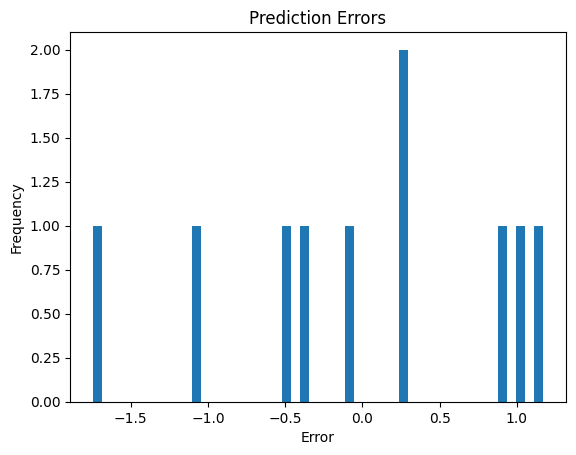

In [8]:
# Make predictions on the testset
testset = trainset.build_testset()
predictions = model.test(testset)

# Calculate Mean Squared Error (MSE)
predicted_ratings = [pred[3] for pred in predictions]
actual_ratings = [pred[2] for pred in predictions]
mse = mean_squared_error(actual_ratings, predicted_ratings)

# Print the result
print("Mean Squared Error (MSE):", mse)

# Plot prediction errors
plt.hist(np.array(actual_ratings) - np.array(predicted_ratings), bins=50)
plt.title("Prediction Errors")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.show()


In [10]:
import pickle # Import the pickle module

# Save the trained model to a file
with open('svd_model.pkl', 'wb') as f:
    pickle.dump(model, f)